In [77]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder


np.set_printoptions(suppress=True)

# Classificação

#### 1. Aquisição dos dados

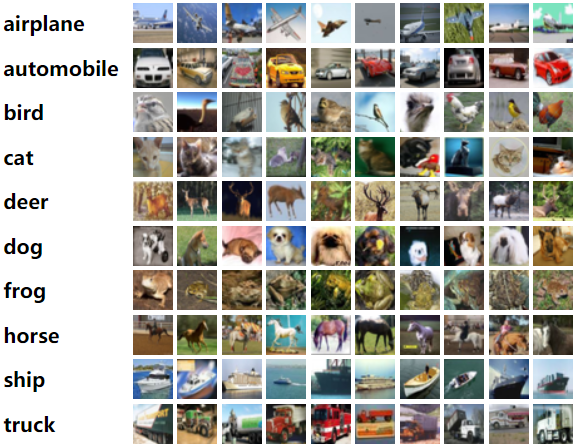

In [53]:
# Load data from dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

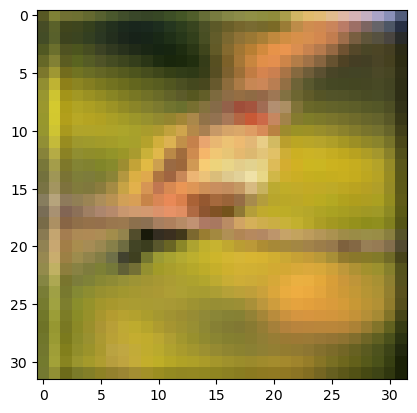

In [54]:
# Escolhendo uma imagem para plotar
sample = np.random.randint(len(x_train)-1)
image = x_train[sample]

# Plotando a imagem
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

#### 2. Pré-processamento

#### Normalização

In [55]:
# divide items by max value
m = np.max(x_train)
x_train = x_train/m
x_test = x_test/m

#### One hot encoder na variável alvo

In [56]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [57]:
# make binary categorization labels
hot = OneHotEncoder()
# '-1' get the length of array 
y_train = hot.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = hot.transform(y_test.reshape(-1, 1)).toarray()

#### 3. Particionamento de base de dados

In [59]:
from sklearn.model_selection import train_test_split

# get 20% from train set and and extract a new validation set
x_treino, x_val, y_treino, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 13)

x_treino.shape, x_val.shape, x_test.shape, y_treino.shape, y_val.shape, y_test.shape, 

((40000, 32, 32, 3),
 (10000, 32, 32, 3),
 (10000, 32, 32, 3),
 (40000, 10),
 (10000, 10),
 (10000, 10))

In [60]:
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.models import Sequential
from keras.callbacks import EarlyStopping

#### 4. Treinamento - definição de arquitetura
1. Definir quantas camadas são necessárias par o problema
2. A quantidade de neurônios em cada camada
3. A função de ativação de cada camada
4. A função de ativação da saída
* softmax (saída não binária)
* sigmoid (saída binária)

In [15]:
x_treino.shape

(40000, 32, 32, 3)

In [61]:
rede_simples = Sequential()

rede_simples.add(Flatten())
rede_simples.add(Dense(25,  input_dim = 784))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(25))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(25))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(10))
rede_simples.add(Activation('softmax'))

### 5. Definir otimizadores

In [62]:
rede_simples.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

#### 6. Treinamento

1. Adicionar conjuntos de treinamento e validação
2. Determinar a quantidade de épocas

In [63]:
#### 6. Treinamento

historico = rede_simples.fit(x_treino, 
                             y_treino, 
                             epochs = 10, 
                             verbose = 1,
                             validation_data = (x_val, y_val))

Epoch 1/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9696 - accuracy: 0.2730 - val_loss: 1.8485 - val_accuracy: 0.3285
Epoch 2/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.8495 - accuracy: 0.3218 - val_loss: 1.7956 - val_accuracy: 0.3376
Epoch 3/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.8162 - accuracy: 0.3391 - val_loss: 1.7777 - val_accuracy: 0.3541
Epoch 4/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.7897 - accuracy: 0.3501 - val_loss: 1.7902 - val_accuracy: 0.3497
Epoch 5/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.7738 - accuracy: 0.3575 - val_loss: 1.8045 - val_accuracy: 0.3495
Epoch 6/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.7593 - accuracy: 0.3636 - val_loss: 1.7463 - val_accuracy: 0.3622
Epoch 7/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.7507 - accuracy: 0.3654 - val_loss: 1.7484 - val_accuracy:

##### 7. Avaliação do modelo

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

pred_simples = rede_simples.predict(x_test)

accuracy_score(y_test.argmax(1), pred_simples.argmax(1))

313/313 [==============================] - 0s 1ms/step


0.3726

In [65]:
y_test.argmax(1)

array([3, 8, 8, ..., 5, 1, 7])

In [66]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [67]:
pred_simples.argmax(1)

array([1, 8, 8, ..., 5, 6, 7])

In [78]:
pred_simples[1]

array([0.02176378, 0.12967907, 0.00230694, 0.00266605, 0.00067628,
       0.00166398, 0.00037877, 0.00128802, 0.67261636, 0.16696067],
      dtype=float32)

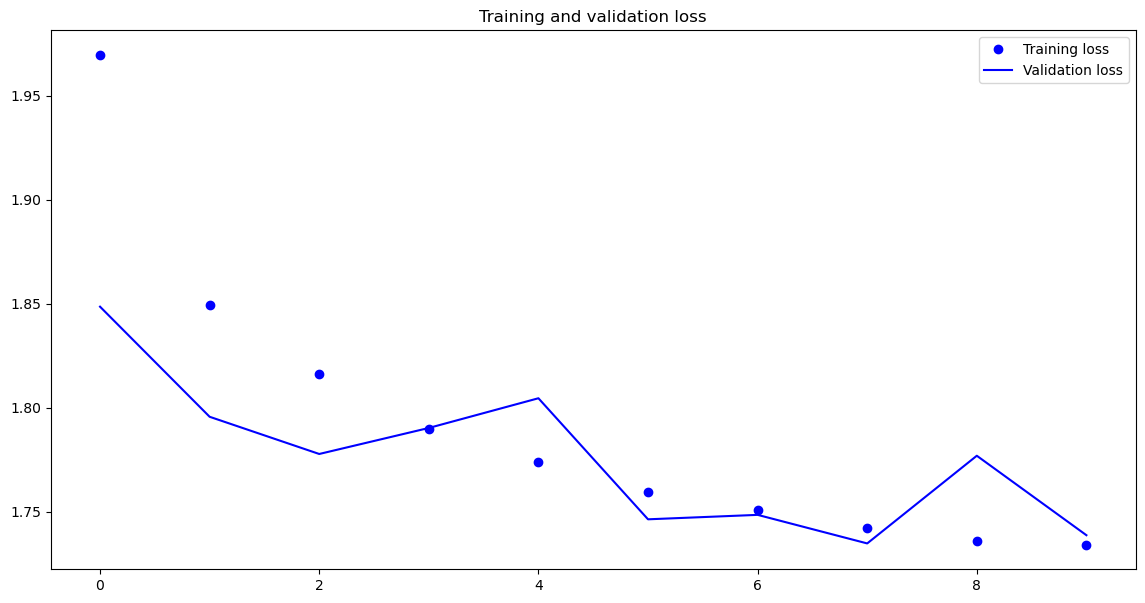

In [79]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
PLOT_WIDE = (14,7)
plt.figure(figsize=PLOT_WIDE)
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### 8. Regularização
1. Early Stopping: determinar quando encerrar o treinamento
2. Dropout: selecionar neurônios aleatoriamente para o treinamento

In [80]:
es = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 10, verbose = 1, mode = 'auto')

# Setamos os pesos iniciais iguais à versão antes do treinamento pra ter um comparativo mais real.
#rede_simples.set_weights(pesos_iniciais)

historico = rede_simples.fit(x_treino, 
                             y_treino, 
                             epochs = 150, 
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7252 - accuracy: 0.3758 - val_loss: 1.7355 - val_accuracy: 0.3731
Epoch 2/150
1250/1250 [==============================] - 3s 3ms/step - loss: 1.7197 - accuracy: 0.3771 - val_loss: 1.7284 - val_accuracy: 0.3710
Epoch 3/150
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7171 - accuracy: 0.3773 - val_loss: 1.7399 - val_accuracy: 0.3710
Epoch 4/150
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7165 - accuracy: 0.3783 - val_loss: 1.7149 - val_accuracy: 0.3801
Epoch 5/150
1250/1250 [==============================] - 3s 3ms/step - loss: 1.7104 - accuracy: 0.3790 - val_loss: 1.7100 - val_accuracy: 0.3828
Epoch 6/150
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7083 - accuracy: 0.3792 - val_loss: 1.7211 - val_accuracy: 0.3760
Epoch 7/150
1250/1250 [==============================] - 3s 2ms/step - loss: 1.7022 - accuracy: 0.3866 - val_loss: 1.7193 - val_ac

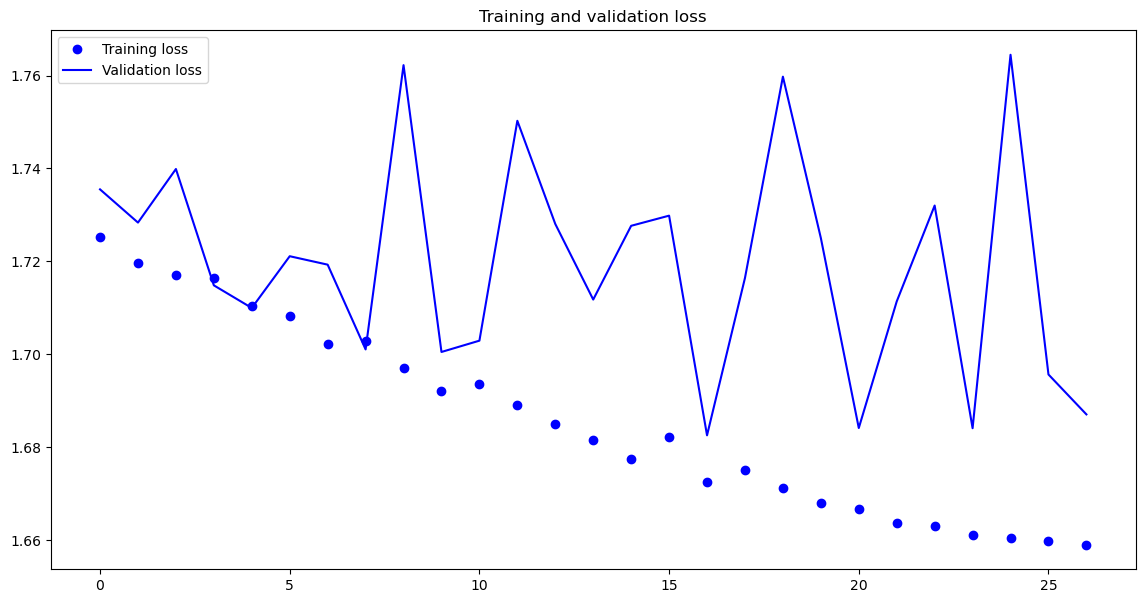

In [81]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure(figsize=PLOT_WIDE)
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

pred_es = rede_simples.predict(x_test)

accuracy_score(y_test.argmax(1), pred_es.argmax(1))

313/313 [==============================] - 0s 1ms/step


0.389

In [83]:
confusion_matrix(y_test.argmax(1), pred_es.argmax(1))

array([[421,  37,  56,  24,  33,  34,  31,  94, 193,  77],
       [ 46, 514,  12,  43,  13,  29,  50,  45,  72, 176],
       [ 83,  37, 140,  56, 208,  97, 189, 140,  33,  17],
       [ 17,  50,  67, 130,  91, 263, 205,  90,  37,  50],
       [ 46,  25, 103,  50, 282,  61, 236, 152,  24,  21],
       [ 15,  33,  51, 104, 100, 377, 146, 105,  41,  28],
       [  2,  30,  65,  65, 131,  73, 550,  47,  13,  24],
       [ 35,  34,  30,  58, 130,  88,  45, 474,  26,  80],
       [137,  84,  17,  29,  11,  60,  18,  27, 528,  89],
       [ 43, 190,  10,  17,  12,  27,  47,  76, 104, 474]])

### Regularização - Dropout

* Alterna quais neurônios vão otimizar os pesos a cada rodada do treinamento

In [84]:
rede_dropout = Sequential()
rede_dropout.add(Flatten())
rede_dropout.add(Dense(25,  input_dim = 784))
rede_dropout.add(Activation('relu'))
rede_dropout.add(Dropout(0.3))
rede_dropout.add(Dense(25))
rede_dropout.add(Activation('relu'))
rede_dropout.add(Dense(25))
rede_dropout.add(Dropout(0.3))
rede_dropout.add(Activation('relu'))
rede_dropout.add(Dense(10))
rede_dropout.add(Activation('softmax'))

rede_dropout.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])


In [85]:
historico = rede_dropout.fit(x_treino, 
                             y_treino, 
                             epochs = 150, 
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150
1250/1250 [==============================] - 4s 3ms/step - loss: 2.3031 - accuracy: 0.0986 - val_loss: 2.3028 - val_accuracy: 0.0943
Epoch 2/150
1250/1250 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3029 - val_accuracy: 0.0943
Epoch 3/150
1250/1250 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0953 - val_loss: 2.3030 - val_accuracy: 0.0955
Epoch 4/150
1250/1250 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3029 - val_accuracy: 0.0943
Epoch 5/150
1250/1250 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3029 - val_accuracy: 0.0943
Epoch 6/150
1250/1250 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.1006 - val_loss: 2.3027 - val_accuracy: 0.0955
Epoch 7/150
1250/1250 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0993 - val_loss: 2.3029 - val_ac

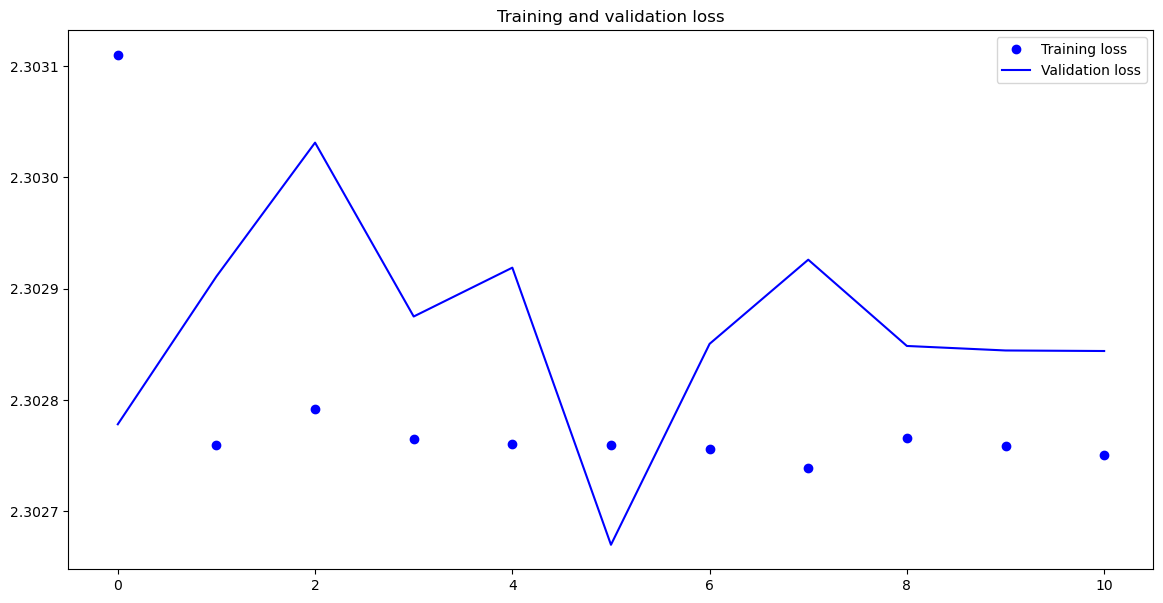

In [86]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure(figsize=PLOT_WIDE)
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [87]:
pred_dropout = rede_dropout.predict(x_test)

accuracy_score(y_test.argmax(1), pred_dropout.argmax(1))

313/313 [==============================] - 0s 885us/step


0.1

In [89]:
confusion_matrix(y_test.argmax(1), pred_dropout.argmax(1))

array([[1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0]])

# Regressão

In [90]:
(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data()

57026/57026 [==============================] - 0s 2us/step


In [91]:
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

x_test -= mean
x_test /= std

In [92]:
from sklearn.model_selection import train_test_split

x_treino, x_val, y_treino, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 13)

x_treino.shape, x_val.shape, x_test.shape, y_treino.shape, y_val.shape, y_test.shape, 

((323, 13), (81, 13), (102, 13), (323,), (81,), (102,))

In [35]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_treino.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

In [36]:
es = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 10, verbose = 1, mode = 'auto')

historico = model.fit(x_treino, 
                             y_treino, 
                             epochs = 150, 
                             batch_size=64,
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150
6/6 [==============================] - 1s 57ms/step - loss: 563.2303 - mae: 21.9479 - val_loss: 491.0142 - val_mae: 19.8939
Epoch 2/150
6/6 [==============================] - 0s 10ms/step - loss: 518.5828 - mae: 20.9019 - val_loss: 455.3185 - val_mae: 18.8835
Epoch 3/150
6/6 [==============================] - 0s 10ms/step - loss: 479.3140 - mae: 19.9501 - val_loss: 415.2350 - val_mae: 17.7997
Epoch 4/150
6/6 [==============================] - 0s 10ms/step - loss: 436.3035 - mae: 18.8973 - val_loss: 379.9480 - val_mae: 16.8480
Epoch 5/150
6/6 [==============================] - 0s 10ms/step - loss: 396.2419 - mae: 17.8478 - val_loss: 342.0292 - val_mae: 15.7927
Epoch 6/150
6/6 [==============================] - 0s 10ms/step - loss: 353.0752 - mae: 16.6489 - val_loss: 303.8524 - val_mae: 14.7740
Epoch 7/150
6/6 [==============================] - 0s 10ms/step - loss: 309.5138 - mae: 15.3543 - val_loss: 262.7321 - val_mae: 13.6581
Epoch 8/150
6/6 [==============================]

In [37]:
pred_simples = model.predict(x_test)

4/4 [==============================] - 0s 3ms/step


In [38]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, pred_simples)

3.186916175543093

In [39]:
import pandas as pd

resultado = pd.DataFrame()
resultado['y_test'] = y_test
resultado['y_pred'] = pred_simples

resultado

,y_test,y_pred
0,7.2,8.363080
1,18.8,17.310160
2,19.0,20.867069
3,27.0,32.678493
4,22.2,24.806330
...,...,...
97,21.9,48.477245
98,24.1,26.655731
99,50.0,47.270794
100,26.7,31.939167
